In [228]:
import pandas as pd
sheets=pd.read_excel('C:\\Users\\f\\Documents\\BEMOL\\Desafio técnico-20191130T192230Z-001\\dados.xlsx',
                     sheet_name=['realizado','orcado'])
realizado = sheets['realizado']
realizado = realizado.drop('Unnamed: 0',axis=1)
realizado.columns =['0', '1','2', '3','4','5','6','7','8','9','10','11']
realizado.index =['mês','realizado']
realizado

,0,1,2,3,4,5,6,7,8,9,10,11
mês,janeiro,fevereiro,março,abril,maio,junho,julho,agosto,setembro,outubro,novembro,dezembro
realizado,240,280,200,310,230,213,239,210,210,210,232,213


In [243]:
val_realizado=realizado.transpose()
val_realizado= pd.DataFrame(val_realizado)
val_realizado

,mês,realizado
0,janeiro,240
1,fevereiro,280
2,março,200
3,abril,310
4,maio,230
5,junho,213
6,julho,239
7,agosto,210
8,setembro,210
9,outubro,210


In [250]:
orcado = sheets['orcado']
orcado = pd.DataFrame(orcado)
orcado

,mês,orcado
0,janeiro,330
1,fevereiro,290
2,março,230
3,abril,321
4,maio,283
5,junho,291
6,julho,193
7,agosto,259
8,setembro,289
9,outubro,230


In [256]:
df_result =  pd.merge(orcado, val_realizado, how='inner', on=['mês'])
df_result

,mês,orcado,realizado
0,janeiro,330,240
1,fevereiro,290,280
2,março,230,200
3,abril,321,310
4,maio,283,230
5,junho,291,213
6,julho,193,239
7,agosto,259,210
8,setembro,289,210
9,outubro,230,210


In [273]:
df_result['diff'] = df_result['orcado'] - df_result['realizado']
df_result

,mês,orcado,realizado,diff
0,janeiro,330,240,90
1,fevereiro,290,280,10
2,março,230,200,30
3,abril,321,310,11
4,maio,283,230,53
5,junho,291,213,78
6,julho,193,239,-46
7,agosto,259,210,49
8,setembro,289,210,79
9,outubro,230,210,20


In [274]:
df_result.to_csv('results.csv', index=False)

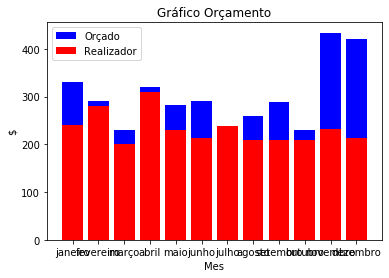

In [306]:
import matplotlib.pyplot as plt
x1 = orcado["mês"]
y1 = orcado["orcado"]

x2 = val_realizado["mês"]
y2 = val_realizado["realizado"]

# Colors: https://matplotlib.org/api/colors_api.html

plt.bar(x1, y1, label="Orçado", color='b')
plt.bar(x2, y2, label="Realizador", color='r')
plt.plot()

plt.xlabel("Mes")
plt.ylabel("$")
plt.title("Gráfico Orçamento")
plt.legend()
plt.savefig('grafico.png')
plt.show()